In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from os import path
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img, save_img
from tensorflow.keras.models import load_model

Using TensorFlow backend.


In [3]:
model_ANN = load_model("drive/My Drive/Colab Notebooks/ANN_v2_beta.h5")
model_CNN = load_model("drive/My Drive/Colab Notebooks/CNN_v2_beta.h5")
model_TL = load_model("drive/My Drive/Colab Notebooks/TL_v3_beta.h5")

history_ANN = pd.read_csv('drive/My Drive/Colab Notebooks/ANN_v2_history.csv')
history_CNN = pd.read_csv('drive/My Drive/Colab Notebooks/CNN_v2_history.csv')
history_TL = pd.read_csv('drive/My Drive/Colab Notebooks/TL_v3_history.csv')

!unzip 'drive/My Drive/Colab Notebooks/TRAINING_v2.zip'

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Archive:  drive/My Drive/Colab Notebooks/TRAINING_v2.zip
   creating: TRAIN/
   creating: TRAIN/TRUE/
  inflating: TRAIN/TRUE/0.jpg        
  inflating: TRAIN/TRUE/1.jpg        
  inflating: TRAIN/TRUE/2.jpg        
  inflating: TRAIN/TRUE/3.jpg        
  inflating: TRAIN/TRUE/4.jpg        
  inflating: TRAIN/TRUE/6.jpg        
  inflating: TRAIN/TRUE/7.jpg        
  inflating: TRAIN/TRUE/9.jpg        
  inflating: TRAIN/TRUE/11.jpg       
  inflating: TRAIN/TRUE/12.jpg       
  inflating: TRAIN/TRUE/13.jpg       
  inflating: TRAIN/TRUE/14.jpg       
  inflating: TRAIN/TRUE/15.jpg 

In [0]:
model_CNN.summary()
from keras.utils import plot_model
plot_model(model_CNN, to_file='model.png')

Model: "CNN_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 125, 125, 64)      9472      
_________________________________________________________________
BN_1 (BatchNormalization)    (None, 125, 125, 64)      256       
_________________________________________________________________
ReLu_1 (Activation)          (None, 125, 125, 64)      0         
_________________________________________________________________
Dropout_1 (Dropout)          (None, 125, 125, 64)      0         
_________________________________________________________________
Max_Pool_1 (MaxPooling2D)    (None, 62, 62, 64)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 60, 60, 128)       73

TypeError: ignored

# CONTOH AUGMENTASI DI KERAS

# PLOT LOSS

In [0]:
fig = plt.figure()
plt.title('Loss ANN')
plt.plot(history_ANN['loss_train'], label='Loss Train')
plt.plot(history_ANN['loss_val'], label='Loss Validation')
plt.legend(loc = 1)
plt.show
fig.savefig('loss_ANN.png', format='png', dpi=1000)

In [0]:
fig = plt.figure()
plt.title('Loss CNN')
plt.plot(history_CNN['loss_train'], label='Loss Train')
plt.plot(history_CNN['loss_val'], label='Loss Validation')
plt.legend(loc = 1)
plt.show
fig.savefig('loss_CNN.png', format='png', dpi=1000)

In [0]:
fig = plt.figure()
plt.title('Loss Transfer Learning')
plt.plot(history_TL['loss_train'], label='Loss Train')
plt.plot(history_TL['loss_val'], label='Loss Validation')
plt.legend(loc = 1)
plt.show
fig.savefig('loss_TL.png', format='png', dpi=1000)

# PLOT ACCURACY

In [0]:
fig = plt.figure()
plt.title('Accuracy ANN')
plt.plot(history_ANN['acc_train'], label='Accuracy Train')
plt.plot(history_ANN['acc_val'], label='Accuracy Validation')
plt.legend(loc = 4)
plt.show
fig.savefig('acc_ANN.png', format='png', dpi=1000)

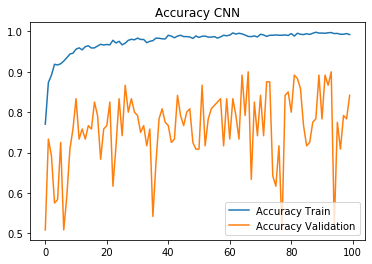

In [0]:
fig = plt.figure()
plt.title('Accuracy CNN')
plt.plot(history_CNN['acc_train'], label='Accuracy Train')
plt.plot(history_CNN['acc_val'], label='Accuracy Validation')
plt.legend(loc = 4)
plt.show
fig.savefig('acc_CNN.png', format='png', dpi=1000)

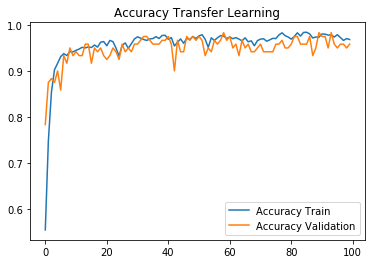

In [0]:
fig = plt.figure()
plt.title('Accuracy Transfer Learning')
plt.plot(history_TL['acc_train'], label='Accuracy Train')
plt.plot(history_TL['acc_val'], label='Accuracy Validation')
plt.legend(loc = 4)
plt.show
fig.savefig('acc_TL.png', format='png', dpi=1000)

# PLOT PERBANDINGAN

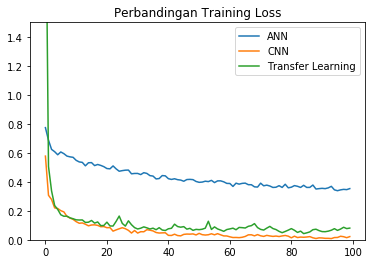

In [0]:
fig = plt.figure()
plt.title('Perbandingan Training Loss')
plt.plot(history_ANN['loss_train'], label='ANN')
plt.plot(history_CNN['loss_train'], label= 'CNN')
plt.plot(history_TL['loss_train'], label = 'Transfer Learning')
plt.legend(loc = 1)
plt.ylim((0, 1.5))
plt.show
fig.savefig('loss_train.png', format='png', dpi=1000)

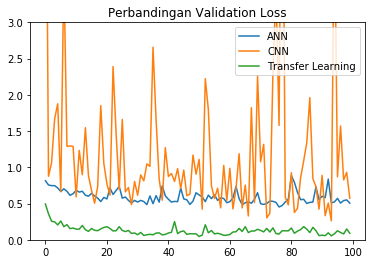

In [0]:
fig = plt.figure()
plt.title('Perbandingan Validation Loss')
plt.plot(history_ANN['loss_val'], label='ANN')
plt.plot(history_CNN['loss_val'], label= 'CNN')
plt.plot(history_TL['loss_val'], label = 'Transfer Learning')
plt.legend(loc = 1)
plt.ylim((0, 3))
plt.show
fig.savefig('loss_val.png', format='png', dpi=1000)

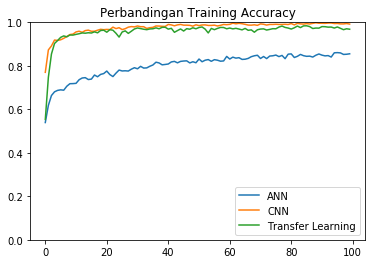

In [0]:
fig = plt.figure()
plt.title('Perbandingan Training Accuracy')
plt.plot(history_ANN['acc_train'], label='ANN')
plt.plot(history_CNN['acc_train'], label= 'CNN')
plt.plot(history_TL['acc_train'], label = 'Transfer Learning')
plt.legend(loc = 4)
plt.ylim((0, 1))
plt.show
fig.savefig('acc_train.png', format='png', dpi=1000)

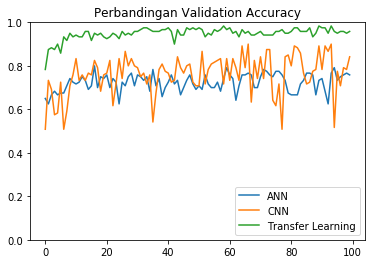

In [0]:
fig = plt.figure()
plt.title('Perbandingan Validation Accuracy')
plt.plot(history_ANN['acc_val'], label='ANN')
plt.plot(history_CNN['acc_val'], label= 'CNN')
plt.plot(history_TL['acc_val'], label = 'Transfer Learning')
plt.legend(loc = 4)
plt.ylim((0, 1))
plt.show
fig.savefig('acc_val.png', format='png', dpi=1000)

# BUAT CONFUSION MATRIX

In [0]:
# confusion matrix plotter [1]
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    #ax.set_ylim(ax.data.c - .5, - .5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    
    return ax


np.set_printoptions(precision=2)

In [0]:
label = np.array(("False", "True"))

def performance(model, dirr):
  i = 0
  j = 0
  k = 0
  l = 0

  y_pred = np.array(())
  y_true = np.array(())

  for path in os.listdir(dirr + 'TRUE/'):
    img = load_img(dirr + 'TRUE/' + path)  # this is a PIL image
    x = img_to_array(img)/255  # this is a Numpy array with shape (3, 150, 150)
    img_array = x
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    prob = model.predict(x)
    if prob >= 0.5:
      j += 1
      y_pred = np.append(y_pred, int(1))
    else:
      y_pred = np.append(y_pred, int(0))
      save_img('drive/My Drive/Colab Notebooks/false negative ' + str(i) + '.jpg', img_array)
    y_true = np.append(y_true, int(1))
    i += 1

  for path in os.listdir(dirr + 'FALSE/'):
    img = load_img(dirr + 'FALSE/' + path)  # this is a PIL image
    x = img_to_array(img)/255  # this is a Numpy array with shape (3, 150, 150)
    img_array = x
    x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
    prob = model.predict(x)
    if prob < 0.5:
      l += 1
      y_pred = np.append(y_pred, int(0))
    else:
      y_pred = np.append(y_pred, int(1))
      save_img('drive/My Drive/Colab Notebooks/false positive ' + str(k) + '.jpg', img_array)
    y_true = np.append(y_true, int(0))
    k += 1

  y_true = y_true.astype(int)
  y_pred = y_pred.astype(int)

  print('TRUE : ' + str(j) + ' / ' + str(i))
  print('FALSE : ' + str(l) + ' / ' + str(k))
  print('')
  print('ACC : ' + str((j + l) / (i + k)*100) + ' %')
  print('')
  print('TRUE POSITIVE : ' + str(j) + ' || ' + str(j / i * 100) + ' %')
  print('TRUE NEGATIVE : ' + str(l) + ' || ' + str(l / k * 100) + ' %')
  print('FALSE POSITIVE : ' + str(k - l) + ' || ' + str((k - l) / k * 100) + ' %')
  print('FALSE NEGATIVE : ' + str(i - j) + ' || ' + str((i - j) / i * 100) + ' %')

  return y_true, y_pred

TRAIN : 
TRUE : 1218 / 1301
FALSE : 941 / 1106

ACC : 89.6967179061072 %

TRUE POSITIVE : 1218 || 93.62029208301307 %
TRUE NEGATIVE : 941 || 85.08137432188066 %
FALSE POSITIVE : 165 || 14.91862567811935 %
FALSE NEGATIVE : 83 || 6.379707916986933 %


VAL : 
TRUE : 50 / 60
FALSE : 41 / 60

ACC : 75.83333333333333 %

TRUE POSITIVE : 50 || 83.33333333333334 %
TRUE NEGATIVE : 41 || 68.33333333333333 %
FALSE POSITIVE : 19 || 31.666666666666664 %
FALSE NEGATIVE : 10 || 16.666666666666664 %
Confusion matrix, without normalization
[[ 941  165]
 [  83 1218]]
Normalized confusion matrix
[[0.85 0.15]
 [0.06 0.94]]
Confusion matrix, without normalization
[[41 19]
 [10 50]]
Normalized confusion matrix
[[0.68 0.32]
 [0.17 0.83]]


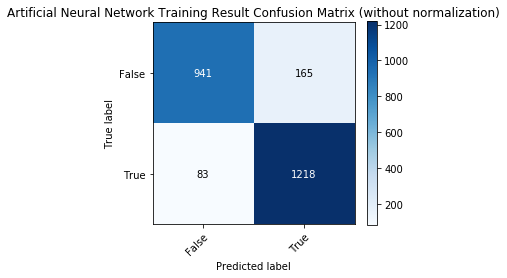

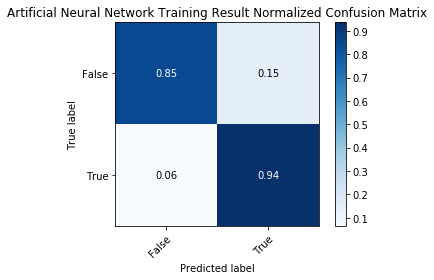

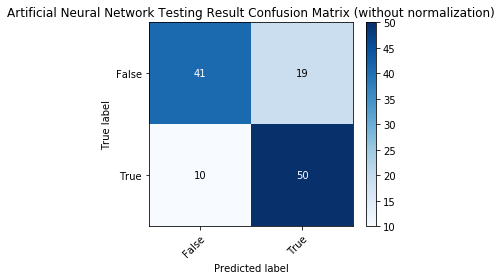

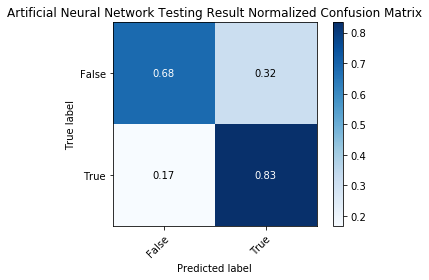

In [0]:
print('TRAIN : ')
y_true_train, y_pred_train = performance(model_ANN, 'TRAIN/')
print('')
print('')
print('VAL : ')
y_true_test, y_pred_test = performance(model_ANN, 'VAL/')

plot_confusion_matrix(y_true_train, y_pred_train, classes=label,
                      title='Artificial Neural Network Training Result Confusion Matrix (without normalization)')

plot_confusion_matrix(y_true_train, y_pred_train, classes=label, normalize=True,
                      title= 'Artificial Neural Network Training Result Normalized Confusion Matrix')


plot_confusion_matrix(y_true_test, y_pred_test, classes=label,
                      title='Artificial Neural Network Testing Result Confusion Matrix (without normalization)')

plot_confusion_matrix(y_true_test, y_pred_test, classes=label, normalize=True,
                      title='Artificial Neural Network Testing Result Normalized Confusion Matrix')

TRAIN : 
TRUE : 1216 / 1301
FALSE : 908 / 1106

ACC : 88.24262567511425 %

TRUE POSITIVE : 1216 || 93.46656418139892 %
TRUE NEGATIVE : 908 || 82.09764918625679 %
FALSE POSITIVE : 198 || 17.90235081374322 %
FALSE NEGATIVE : 85 || 6.533435818601076 %


VAL : 
TRUE : 52 / 60
FALSE : 49 / 60

ACC : 84.16666666666667 %

TRUE POSITIVE : 52 || 86.66666666666667 %
TRUE NEGATIVE : 49 || 81.66666666666667 %
FALSE POSITIVE : 11 || 18.333333333333332 %
FALSE NEGATIVE : 8 || 13.333333333333334 %
Confusion matrix, without normalization
[[ 908  198]
 [  85 1216]]
Normalized confusion matrix
[[0.82 0.18]
 [0.07 0.93]]
Confusion matrix, without normalization
[[49 11]
 [ 8 52]]
Normalized confusion matrix
[[0.82 0.18]
 [0.13 0.87]]


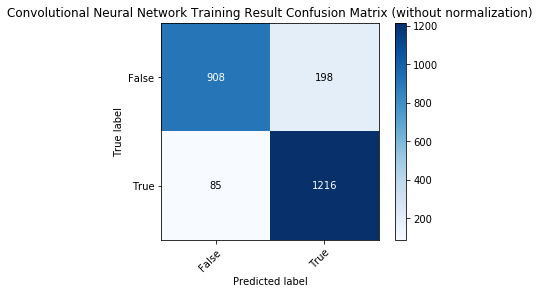

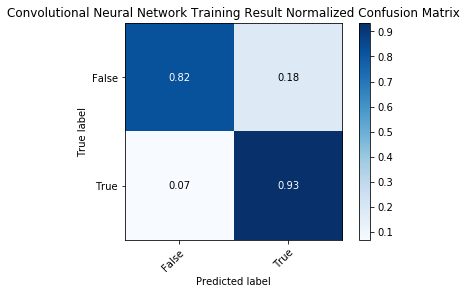

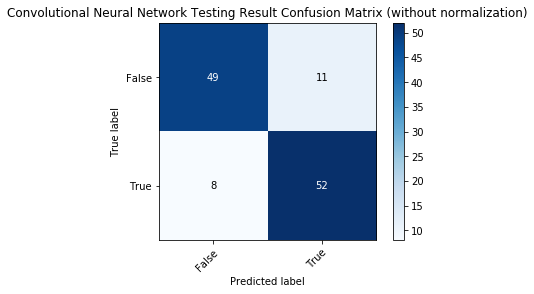

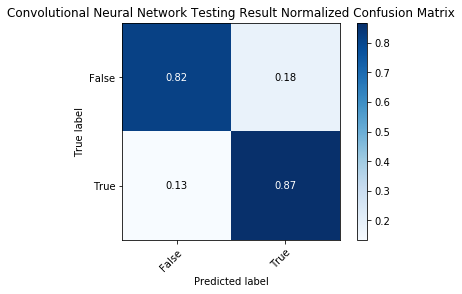

In [0]:
print('TRAIN : ')
y_true_train, y_pred_train = performance(model_CNN, 'TRAIN/')
print('')
print('')
print('VAL : ')
y_true_test, y_pred_test = performance(model_CNN, 'VAL/')


plot_confusion_matrix(y_true_train, y_pred_train, classes=label,
                      title='Convolutional Neural Network Training Result Confusion Matrix (without normalization)')

plot_confusion_matrix(y_true_train, y_pred_train, classes=label, normalize=True,
                      title= 'Convolutional Neural Network Training Result Normalized Confusion Matrix')


plot_confusion_matrix(y_true_test, y_pred_test, classes=label,
                      title='Convolutional Neural Network Testing Result Confusion Matrix (without normalization)')

plot_confusion_matrix(y_true_test, y_pred_test, classes=label, normalize=True,
                      title='Convolutional Neural Network Testing Result Normalized Confusion Matrix')

TRAIN : 
TRUE : 1300 / 1301
FALSE : 1100 / 1106

ACC : 99.7091815538014 %

TRUE POSITIVE : 1300 || 99.92313604919293 %
TRUE NEGATIVE : 1100 || 99.45750452079565 %
FALSE POSITIVE : 6 || 0.5424954792043399 %
FALSE NEGATIVE : 1 || 0.07686395080707148 %


VAL : 
TRUE : 58 / 60
FALSE : 57 / 60

ACC : 95.83333333333334 %

TRUE POSITIVE : 58 || 96.66666666666667 %
TRUE NEGATIVE : 57 || 95.0 %
FALSE POSITIVE : 3 || 5.0 %
FALSE NEGATIVE : 2 || 3.3333333333333335 %
Confusion matrix, without normalization
[[1100    6]
 [   1 1300]]
Normalized confusion matrix
[[9.95e-01 5.42e-03]
 [7.69e-04 9.99e-01]]
Confusion matrix, without normalization
[[57  3]
 [ 2 58]]
Normalized confusion matrix
[[0.95 0.05]
 [0.03 0.97]]


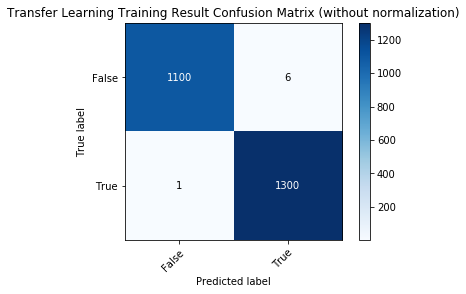

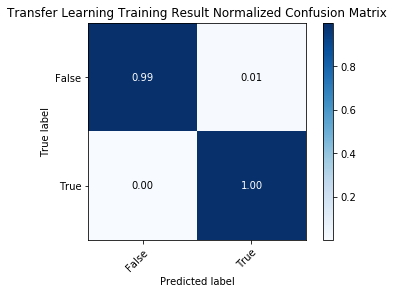

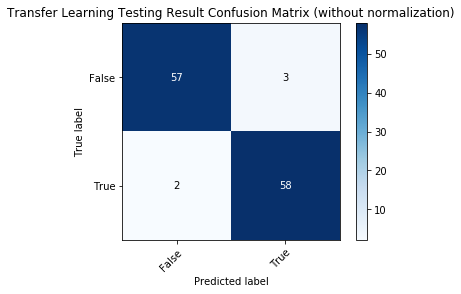

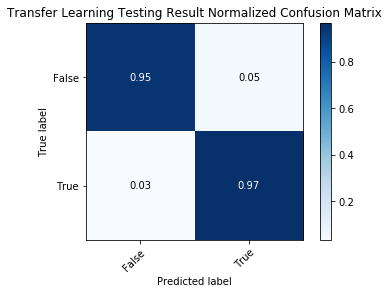

In [0]:
print('TRAIN : ')
y_true_train, y_pred_train = performance(model_TL, 'TRAIN/')
print('')
print('')
print('VAL : ')
y_true_test, y_pred_test = performance(model_TL, 'VAL/')


plot_confusion_matrix(y_true_train, y_pred_train, classes=label,
                      title='Transfer Learning Training Result Confusion Matrix (without normalization)')

plot_confusion_matrix(y_true_train, y_pred_train, classes=label, normalize=True,
                      title= 'Transfer Learning Training Result Normalized Confusion Matrix')


plot_confusion_matrix(y_true_test, y_pred_test, classes=label,
                      title='Transfer Learning Testing Result Confusion Matrix (without normalization)')

plot_confusion_matrix(y_true_test, y_pred_test, classes=label, normalize=True,
                      title='Transfer Learning Testing Result Normalized Confusion Matrix')

In [0]:
k = np.array(())
for i in range(120):
  if y_pred_test[i] == y_true_test[i]:
    pass
  else:
    k = np.append(k, int(i))
    print(i)
k = k.astype(int)

print(k)

21
46
66
74
96
[21 46 66 74 96]


# UJI COBA

In [10]:
dirr = 'VAL/FALSE/2.jpg'
img = load_img(dirr)  # this is a PIL image
x = img_to_array(img)/255  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
prob = model_TL.predict(x)

pred = 0
if prob >= 0.5:
  pred = 1

print(pred, float(prob))

1 0.8587570190429688


In [0]:
y_pred_test, y_true_test

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.